In [2]:
import requests
import folium
from IPython.display import display, HTML, clear_output
import webbrowser
from folium import plugins
import requests
import os
import json
from IPython.display import display, HTML
from dotenv import load_dotenv, find_dotenv

In [3]:
from dotenv import load_dotenv, find_dotenv

load_dotenv()

api_key = os.getenv("FMP_API_KEY")
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
# OPENAI_API_KEY
# api_key

In [4]:
# Define financial statement functions
base_url = "https://financialmodelingprep.com/api"
data_type = "key-metrics"
ticker = "AAPL"
period = "annual"
limit = 1
FMP_API_KEY = api_key
url = f'{base_url}/v3/{data_type}/{ticker}?period={period}&limit={limit}&apikey={FMP_API_KEY}'
response = requests.get(url)
print(url)

https://financialmodelingprep.com/api/v3/key-metrics/AAPL?period=annual&limit=1&apikey=Mp2Ie6nuNHtSJItVtM9hGLQ49hXQhSLo


In [5]:
def get_income_statement(ticker:str)->str:
    base_url = "https://financialmodelingprep.com/api"
    data_type = "income-statement"
    FMP_API_KEY = api_key
    url = f"{base_url}/v3/{data_type}/{ticker}?period=annual&apikey={FMP_API_KEY}"
    response = requests.get(url)
    return json.dumps(response.json())

def get_balance_sheet(ticker:str)->str:
    base_url = "https://financialmodelingprep.com/api"
    data_type = "income-statement"
    FMP_API_KEY = api_key
    url = f"{base_url}/v3/{data_type}/{ticker}?period=annual&apikey={FMP_API_KEY}"
    response = requests.get(url)
    return json.dumps(response.json())

def get_cash_flow_statement(ticker:str)->str:
    base_url = "https://financialmodelingprep.com/api"
    data_type = "cash-flow-statement"
    FMP_API_KEY = api_key
    url = f"{base_url}/v3/{data_type}/{ticker}?period=annual&apikey={FMP_API_KEY}"
    response = requests.get(url)
    return json.dumps(response.json())

def get_key_metrics(ticker:str)->str:
    base_url = "https://financialmodelingprep.com/api"
    data_type = "key-metrics"
    FMP_API_KEY = api_key
    url = f"{base_url}/v3/{data_type}/{ticker}?period=annual&apikey={FMP_API_KEY}"
    response = requests.get(url)
    return json.dumps(response.json())

def get_financial_ratios(ticker:str)->str:
    base_url = "https://financialmodelingprep.com/api"
    data_type = "financial-ratios"
    FMP_API_KEY = api_key
    url = f"{base_url}/v3/{data_type}/{ticker}?period=annual&apikey={FMP_API_KEY}"
    response = requests.get(url)
    return json.dumps(response.json())

def get_financial_growth(ticker:str)->str:
    base_url = "https://financialmodelingprep.com/api"
    data_type = "financial-growth"
    FMP_API_KEY = api_key
    url = f"{base_url}/v3/{data_type}/{ticker}?period=annual&apikey={FMP_API_KEY}"
    response = requests.get(url)
    return json.dumps(response.json())

    

In [6]:
# print("get_income_statement",get_income_statement("AAPL"))
# print("get_balance_sheet \n",get_balance_sheet("AAPL"))
# print("get_cash_flow_statement \n",get_cash_flow_statement("AAPL"))
# print("get_key_metrics \n",get_key_metrics("AAPL"))
# print("get_financial_ratios \n",get_financial_ratios("AAPL"))
# print("get_financial_growth \n",get_financial_growth("AAPL"))


In [7]:
from openai import OpenAI
from dotenv import load_dotenv, find_dotenv
import os

# _ : bool = load_dotenv(find_dotenv()) # read local .env file

client : OpenAI = OpenAI(api_key=OPENAI_API_KEY)

In [8]:
# Map available functions
available_functions = {
    "get_income_statement": get_income_statement,
    "get_balance_sheet": get_balance_sheet,
    "get_cash_flow_statement": get_cash_flow_statement,
    "get_key_metrics": get_key_metrics,
    "get_financial_ratios": get_cash_flow_statement,
    "get_financial_growth": get_financial_ratios
}

In [9]:
bot_instructions = "Act as a financial analyst by accessing detailed financial data through the Financial Modeling Prep API. Your capabilities include analyzing key metrics, comprehensive financial statements, vital financial ratios, and tracking financial growth trends"

In [10]:
tools = [
    {"type": "code_interpreter"},
    {
        "type": "function",
        "function": {
            "name": "get_income_statement",
            "parameters": {
                "type": "object",
                "properties": {
                    "ticker": {"type": "string"},
                },
                "required": ["ticker"],
            }
        }
    },
    {
        "type": "function",
        "function": {
            "name": "get_balance_sheet",
            "parameters": {
                "type": "object",
                "properties": {
                    "ticker": {"type": "string"},
                },
                "required": ["ticker"],
            }
        }
    },
    {
        "type": "function",
        "function": {
            "name": "get_cash_flow_statement",
            "parameters": {
                "type": "object",
                "properties": {
                    "ticker": {"type": "string"},
                },
                "required": ["ticker"],
            }
        }
    },
    {
        "type": "function",
        "function": {
            "name": "get_key_metrics",
            "parameters": {
                "type": "object",
                "properties": {
                    "ticker": {"type": "string"},
                },
                "required": ["ticker"],
            }
        }
    },
    {
        "type": "function",
        "function": {
            "name": "get_financial_ratios",
            "parameters": {
                "type": "object",
                "properties": {
                    "ticker": {"type": "string"},
                },
                "required": ["ticker"],
            }
        }
    },
    {
        "type": "function",
        "function": {
            "name": "get_financial_growth",
            "parameters": {
                "type": "object",
                "properties": {
                    "ticker": {"type": "string"},
                },
                "required": ["ticker"],
            }
        }
    }
]

In [11]:
# A Class to Manage All Open API Assistant Calls and Functions
from openai.types.beta.threads import Run, ThreadMessage
from openai.types.beta.thread import Thread
from openai.types.beta.assistant_create_params import Tool

import time

class FinancialAssistantManager:
    def __init__(self, model: str = "gpt-3.5-turbo-1106"):
        self.client = OpenAI()
        self.model = model
        self.assistant = None
        self.thread = None
        self.run = None

    def create_assistant(self, name: str, instructions: str, tools: list[Tool]) -> None:
        self.assistant = self.client.beta.assistants.create(
            name=name,
            instructions=instructions,
            tools=tools,
            model=self.model
        )

    def create_thread(self) -> Thread:
        self.thread = self.client.beta.threads.create()
        return self.thread

    def add_message_to_thread(self, role: str, content: str) -> None:
        self.client.beta.threads.messages.create(
            thread_id=self.thread.id,
            role=role,
            content=content
        )

    def run_assistant(self, instructions: str) -> Run:
        self.run = self.client.beta.threads.runs.create(
            thread_id=self.thread.id,
            assistant_id=self.assistant.id,
            instructions=instructions
        )
        return self.run

    def wait_for_completion(self, run: Run, thread: Thread) -> Run:

        while run.status in ["in_progress", "queued"]:
            run_status = self.client.beta.threads.runs.retrieve(
                thread_id=self.thread.id,
                run_id=self.run.id
            )
            print(f"Run is {run.status}. Waiting...")
            time.sleep(3)  # Wait for 3 seconds before checking again

            if run_status.status == 'completed':
                processed_response = self.process_messages()
                return processed_response
                # break
            elif run_status.status == 'requires_action':
                print("Function Calling ...")
                self.call_required_functions(run_status.required_action.submit_tool_outputs.model_dump())
            elif run.status == "failed":
                print("Run failed.")
                break
            else:
                print(f"Waiting for the Assistant to process...: {run.status}")

    def process_messages(self) -> list[ThreadMessage]:
        messages: list[ThreadMessage] = self.client.beta.threads.messages.list(thread_id=self.thread.id)
        return messages

    def call_required_functions(self, required_actions: dict):
        tool_outputs = []

        for action in required_actions["tool_calls"]:
            function_name = action['function']['name']
            arguments = json.loads(action['function']['arguments'])
            print('function_name', function_name)
            print('function_arguments', arguments)

            if function_name in available_functions:
                    function_to_call = available_functions[function_name]
                    output = function_to_call(**arguments)
                    tool_outputs.append({
                        "tool_call_id": action['id'],
                        "output": output,
                    })

            else:
                raise ValueError(f"Unknown function: {function_name}")

        print("Submitting outputs back to the Assistant...")
        self.client.beta.threads.runs.submit_tool_outputs(
            thread_id=self.thread.id,
            run_id=self.run.id,
            tool_outputs=tool_outputs
        )

In [12]:
# Show Messages and Plot Images in Financial Analysis If ANY

import requests
from PIL import Image
from IPython.display import Image, display


def download_and_save_image(file_id: str, save_path: str) -> None:
    """
    Downloads an image from OpenAI using its file ID and saves it to the specified path.

    Args:
    - file_id (str): The ID of the file to download.
    - save_path (str): The path where the image will be saved.

    Returns:
    - None
    """
    # Construct the URL to download the image
    download_url = f"https://api.openai.com/v1/files/{file_id}/content"

    # Perform the HTTP GET request to download the image
    response = requests.get(download_url, headers={"Authorization": f'Bearer {os.getenv("OPENAI_API_KEY")}'})

    # Check if the request was successful
    if response.status_code == 200:
        # Write the image to the specified file
        with open(save_path, 'wb') as file:
            file.write(response.content)
        print(f"Image downloaded and saved to {save_path}")
    else:
        print(f"Failed to download image: HTTP Status Code {response.status_code}")


def pretty_print(messages: list[ThreadMessage]) -> None:
    print("# Messages")
    for message in messages.data:
        role_label = "User" if message.role == "user" else "Assistant"
        # Check the type of message content and handle accordingly
        for content in message.content:
            if content.type == "text":
                message_content = content.text.value
                print(f"{role_label}: {message_content}\n")
                print()
            elif content.type == "image_file":
                # Handle image file content, e.g., print the file ID or download the image
                image_file_id = content.image_file.file_id
                print(f"{role_label}: Image file ID: {image_file_id}")
                # Define a path to save the image
                image_save_path = f"image_{image_file_id}.png"
                # Download and save the image
                # print(f"{role_label}: Image file ID: {image_file_id}")
                download_and_save_image(image_file_id, image_save_path)

                # Display the image within Jupyter Notebook
                display(Image(filename=image_save_path))

                #   # Open and display the image
                # try:
                #     img = Image.open(image_save_path)
                #     img.show()
                # except IOError:
                #     print("Error in opening the image file.")

In [13]:
def fmp_financial_analyst(prompt: str):
    fmp_analyst = FinancialAssistantManager()

    fmp_analyst.create_assistant(
        name="Financial Analyst",
        instructions=bot_instructions,
        tools=tools
    )

    fmp_analyst.create_thread()

    fmp_analyst.add_message_to_thread(
        role="user",
        content=prompt
    )

    run = fmp_analyst.run_assistant(
        instructions=bot_instructions
    )

    final_res = fmp_analyst.wait_for_completion(
        run=run,
        thread=fmp_analyst.thread
    )

    return final_res
    

In [14]:
# analysis1 = fmp_financial_analyst("Can you compare the financial health of Microsoft and Apple over the last years, focusing on their balance sheets and key financial ratios?")

In [15]:
# pretty_print(analysis1)

## Visualize Microsoft vs. Googles's revenue & profitability

In [16]:
response2 = fmp_financial_analyst("""Evaluate Microsoft vs. Googles's revenue & profitability} growth over the past 4 quarters. only Visualize the results with one or more charts. we dont need any explaination. just the charts.""")

Run is queued. Waiting...
Waiting for the Assistant to process...: queued
Run is queued. Waiting...
Function Calling ...
function_name get_income_statement
function_arguments {'ticker': 'MSFT'}
function_name get_income_statement
function_arguments {'ticker': 'GOOGL'}
function_name get_financial_growth
function_arguments {'ticker': 'MSFT'}
function_name get_financial_growth
function_arguments {'ticker': 'GOOGL'}
Submitting outputs back to the Assistant...
Run is queued. Waiting...
Waiting for the Assistant to process...: queued
Run is queued. Waiting...
Waiting for the Assistant to process...: queued
Run is queued. Waiting...
Waiting for the Assistant to process...: queued
Run is queued. Waiting...
Waiting for the Assistant to process...: queued
Run is queued. Waiting...
Waiting for the Assistant to process...: queued
Run is queued. Waiting...
Waiting for the Assistant to process...: queued
Run is queued. Waiting...
Waiting for the Assistant to process...: queued
Run is queued. Waiting.

# Messages
Assistant: Image file ID: file-vyBz899dNTHyjDjQNigAp6uW
Image downloaded and saved to image_file-vyBz899dNTHyjDjQNigAp6uW.png


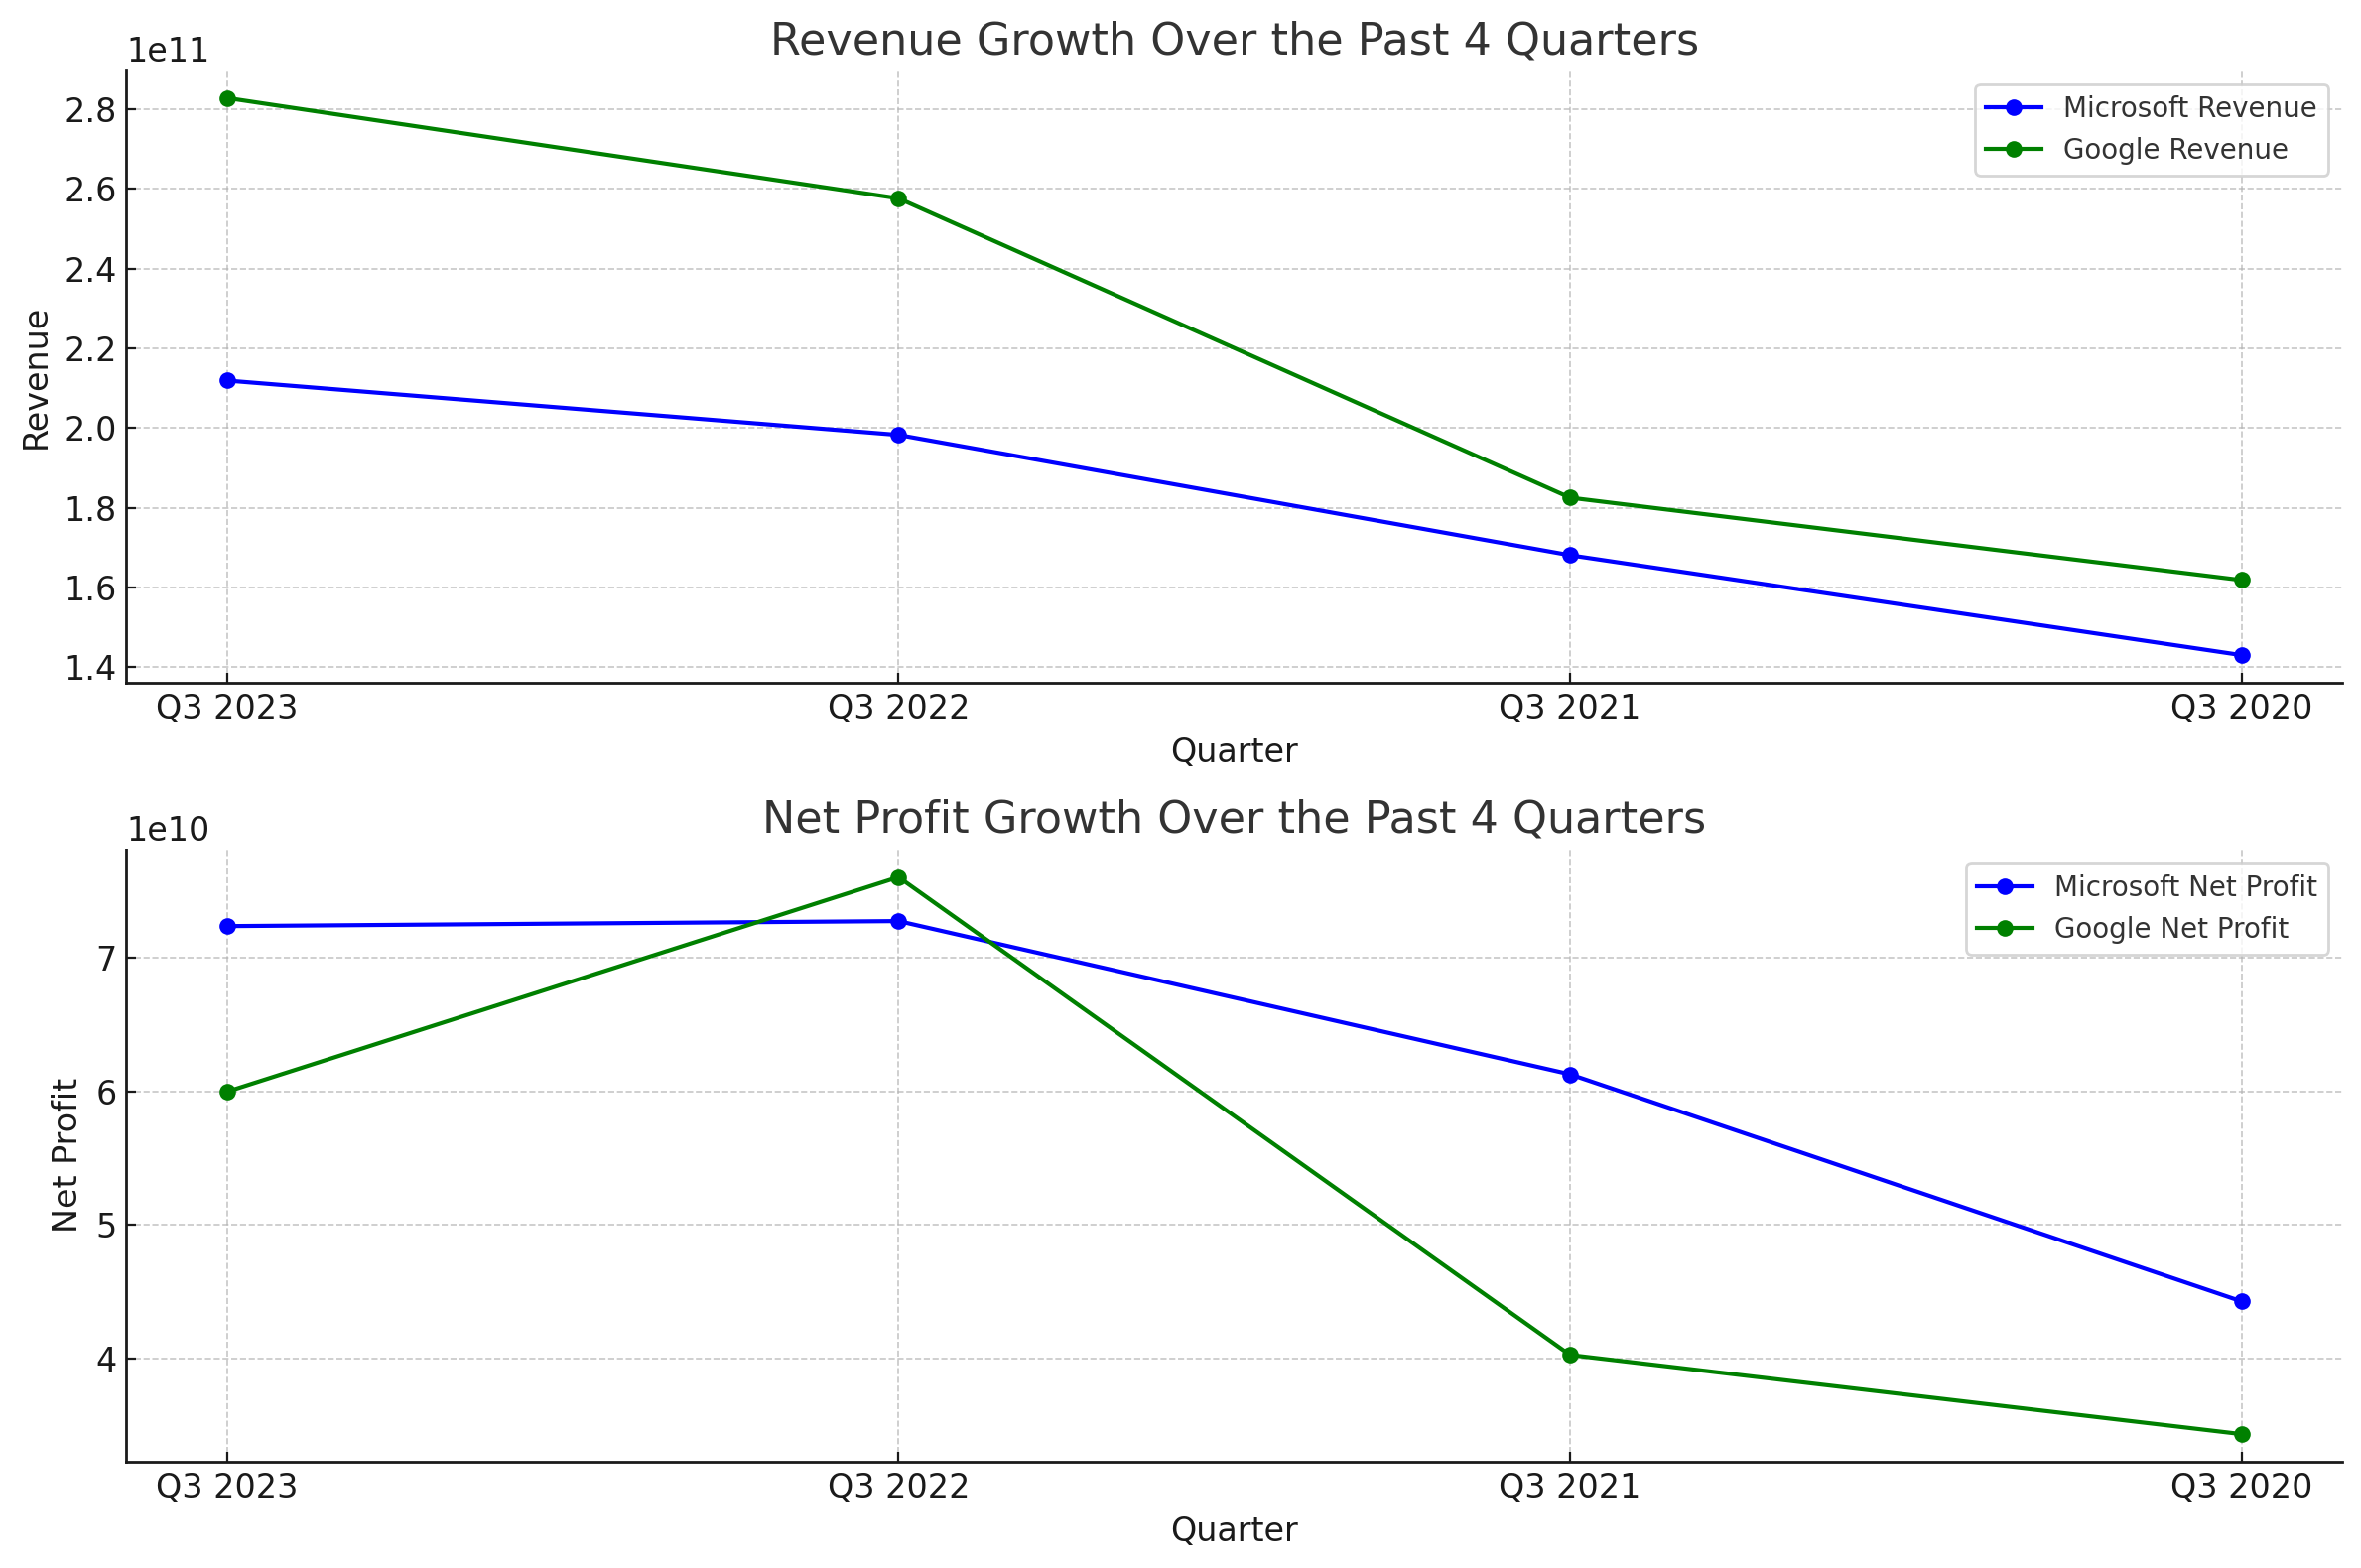

Assistant: Here are the revenue and net profit growth charts over the past 4 quarters for Microsoft and Google. The blue lines represent Microsoft, and the green lines represent Google.


User: Evaluate Microsoft vs. Googles's revenue & profitability} growth over the past 4 quarters. only Visualize the results with one or more charts. we dont need any explaination. just the charts.




In [17]:
pretty_print(response2)

In [19]:
response2 = fmp_financial_analyst("brif explain about financial modeling prep API explain in max 50 words")

Run is queued. Waiting...
Waiting for the Assistant to process...: queued
Run is queued. Waiting...


In [20]:
pretty_print(response2)

# Messages
Assistant: The Financial Modeling Prep API provides access to comprehensive financial data, including income statements, balance sheets, cash flow statements, key metrics, financial ratios, and growth trends. It allows analysts to retrieve, analyze, and integrate fundamental financial data for various stocks and companies.


User: brif explain about financial modeling prep API explain in max 50 words




ask Question reather then function calling